From the USER Data, we could deduce that
'BIRTH_DATE' as approximately 4% missing values,
'STATE' as approximately 5% missing values,
'LANGUAGE' as about 30.5% missing values and
'GENDER' as approximately 6% missing values.

From the TRANSACTION DATA, We could account for a total of 171 duplicates. All but the 'BARCODE' as no missing values. the 'BARCODE' column with about 11.5% missing values.

From the Product Data, we have a total of 215 duplicate from the Data. All the columns in the data has got missing values. Category_1 with 0.01%, Category_2 with 0.17%, Category_3 with 7.16%, Category_4 with  92.02%, Manufacturer with 26.78%, Brand with 26.78%, Barcode with 0.48%.


# importing necessary Libraries

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the data set

In [ ]:
# creating the variable called user_takehome
user_takehome = pd.read_csv('/content/USER_TAKEHOME.csv')
# creating the variable called trans_takehome
trans_takehome = pd.read_csv('/content/TRANSACTION_TAKEHOME.csv')
# creating the variable called trans_takehome
pro_takehome = pd.read_csv('/content/PRODUCTS_TAKEHOME.csv')

# Displaying Relevant information of the Dataset

In [ ]:
user_takehome.head() #getting the first 5 of the data

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [ ]:
pro_takehome.head() #getting the first 5 of the data

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [ ]:
trans_takehome.head() #getting the first 5 of the data

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [ ]:
user_takehome.info() #getting the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [ ]:
pro_takehome.info() #getting the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [ ]:
trans_takehome.info() #getting the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


# Identifying the missing values (Data Completeness)

In [ ]:
user_takehome.isnull().sum() #getting the null values of the data

,0
ID,0
CREATED_DATE,0
BIRTH_DATE,3675
STATE,4812
LANGUAGE,30508
GENDER,5892


In [ ]:
trans_takehome.isnull().sum() #getting the null values of the data


,0
RECEIPT_ID,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
BARCODE,5762
FINAL_QUANTITY,0
FINAL_SALE,0


In [ ]:
pro_takehome.isnull().sum() #getting the null values of the data

,0
CATEGORY_1,111
CATEGORY_2,1424
CATEGORY_3,60566
CATEGORY_4,778093
MANUFACTURER,226474
BRAND,226472
BARCODE,4025


# Identifying the Duplicated records (Data Uniqueness)

In [ ]:
user_takehome.duplicated().sum() #getting the duplicated values of the data

0

In [ ]:
trans_takehome.duplicated().sum() #getting the duplicated values of the data

171

In [ ]:
pro_takehome.duplicated().sum()

215

# Exploration with Visualization

In [ ]:
user_takehome.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


<BarContainer object of 10 artists>

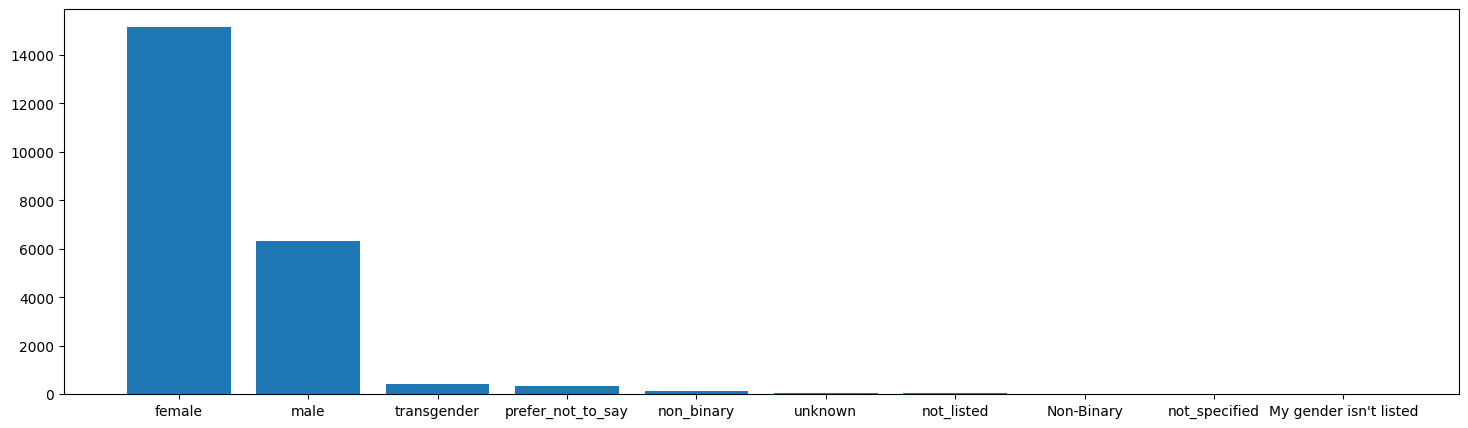

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(user_takehome['GENDER'].value_counts().index, user_takehome['GENDER'].value_counts().values)

<BarContainer object of 52 artists>

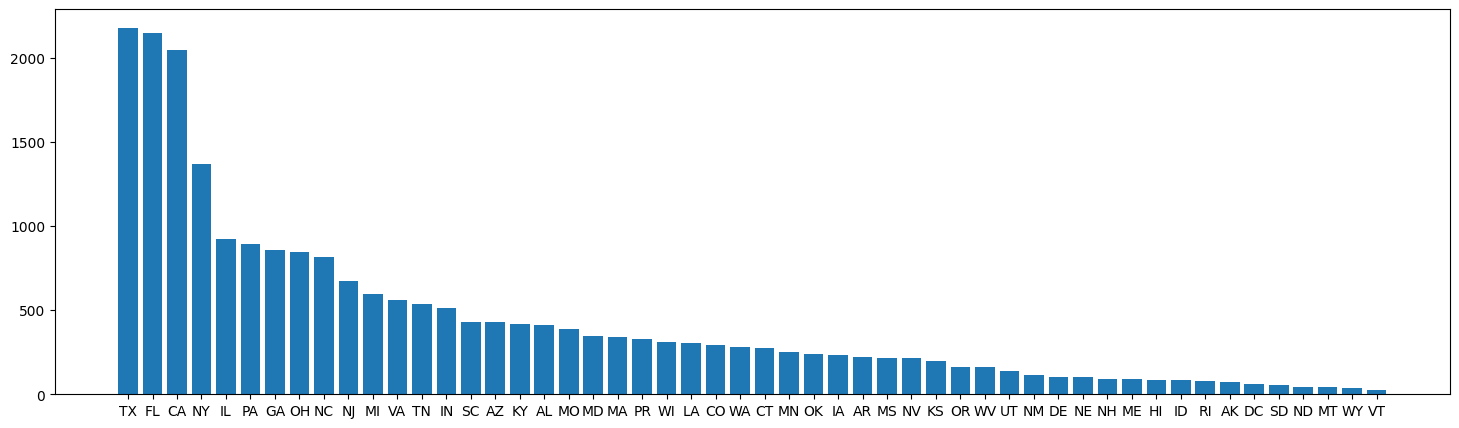

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(user_takehome['STATE'].value_counts().index, user_takehome['STATE'].value_counts().values)

In [ ]:
trans_takehome.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


What Store is making the most sales

In [ ]:
trans_takehome.groupby('STORE_NAME')['FINAL_SALE'].sum().sort_values(ascending=False)

,FINAL_SALE
STORE_NAME,
SMART SHOP,9.97 0.78
LAZY ACRES,8.99
BELACINO'S,8.59
FRESCO Y MÁS,7.983.00 3.29
SCHOFIELD BARRACKS COMMISSARY,7.65
...,...
LAKEWOOD SUPERVALU,
LA PLACITA SUPERMARKET,
LA PANZA FELIZ,


<BarContainer object of 954 artists>

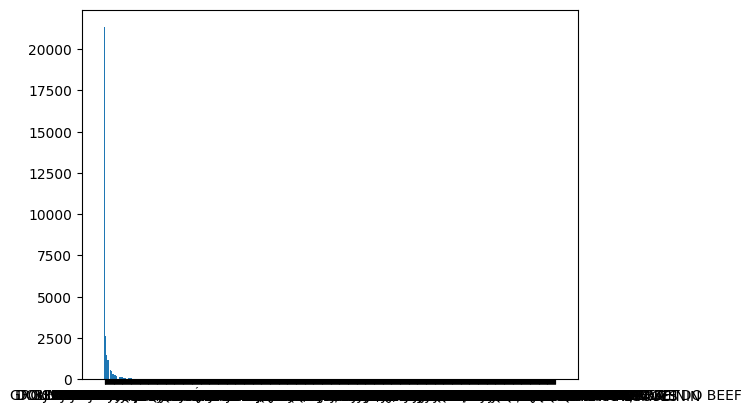

In [57]:

plt.bar(trans_takehome['STORE_NAME'].value_counts().index, trans_takehome['STORE_NAME'].value_counts().values)

# Retenetion Analysis

In [ ]:
trans_takehome.groupby('USER_ID')['RECEIPT_ID'].count().sort_values(ascending=False)

,RECEIPT_ID
USER_ID,
62925c1be942f00613f7365e,9
60a5363facc00d347abadc8e,7
64e62de5ca929250373e6cf5,6
5c8fdcc79d47895c54a6fe22,6
609af341659cf474018831fb,6
...,...
615a518c5526ad3d997e4be3,1
615a90298a590a21a168804a,1
615abf7e00a7980b00a3c5ec,1


In [ ]:
pro_takehome.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


<BarContainer object of 14 artists>

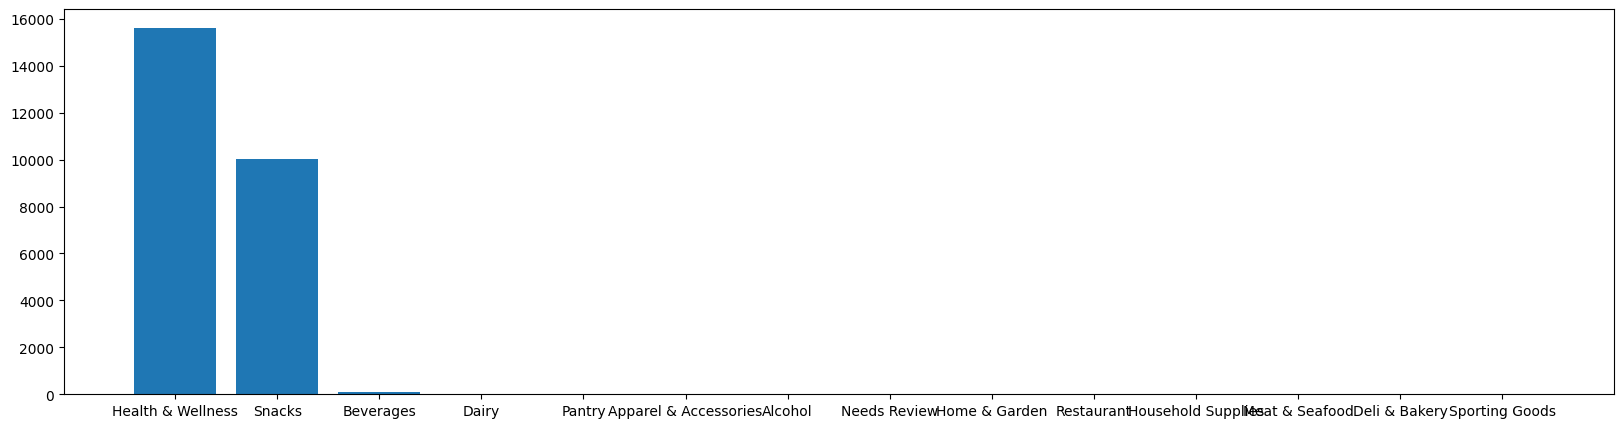

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(pro_takehome['CATEGORY_1'].value_counts().index, pro_takehome['CATEGORY_1'].value_counts().values)